## AUMENTO DO PREÇO DOS COMBUSTÍVEIS AO LONGO DOS ANOS NO BRASIL 

### Pós-graduação Lato Sensu em Ciência de Dados e Big Data
#### Aluna: Jessica Rosa da Silva Salvador

In [108]:
import numpy as np
import pandas as pd
import requests

!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# SKLearning - Utilizada para treinar e testar a regressão linear executada no projeto
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [109]:
def defDatasetTamanho(df):
    shape = df.shape
    print("O dataset apresenta " + str(shape[1]) + " colunas e " + str(shape[0]) + " registros.\n")
    
def deftiposeNulos(df):
    print("A seguir a listagem da tipagem das colunas e seu nível de preenchimento:\n")
    
    #display(df.columns)
    # info on variable types and filling factor
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
    display(tab_info.transpose())
    

### Importando a base de dados dos preços de combustíveis(período de 2011 até 2022)

In [110]:
base1 = pd.read_excel('mensal-estados-2001-a-2012.xlsx')

In [111]:
base2 = pd.read_excel('mensal-estados-desde-jan2013.xlsx')

### Concatenação e Tratamento da base de dados de combustíveis

In [112]:
#União dos dois dataframes utilizando do concat
base_df = pd.concat([base1, base2], axis=0)

In [113]:
defDatasetTamanho(base_df)
deftiposeNulos(base_df)

O dataset apresenta 17 colunas e 34813 registros.

A seguir a listagem da tipagem das colunas e seu nível de preenchimento:



,column type,null values,null values (%)
MÊS,datetime64[ns],0,0.0
PRODUTO,object,0,0.0
REGIÃO,object,0,0.0
ESTADO,object,0,0.0
NÚMERO DE POSTOS PESQUISADOS,int64,0,0.0
UNIDADE DE MEDIDA,object,0,0.0
PREÇO MÉDIO REVENDA,float64,0,0.0
DESVIO PADRÃO REVENDA,float64,0,0.0
PREÇO MÍNIMO REVENDA,float64,0,0.0
PREÇO MÁXIMO REVENDA,float64,0,0.0


#### Correções de tipagem e valores errados

In [114]:
# Acertando a tipagem das colunas para poder unir os dois dataframes 
# Como tem valores com '-' os mesmos ficam nulos quando acontece a conversão
base_df['PREÇO MÉDIO DISTRIBUIÇÃO'] = pd.to_numeric(base_df['PREÇO MÉDIO DISTRIBUIÇÃO'], errors='coerce')

In [115]:
#Temos produtos repetidos por falta de acento nas palavras
base_df["PRODUTO"].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [116]:
#Acertando os valores
base_df = base_df.replace("OLEO DIESEL", "ÓLEO DIESEL")
base_df = base_df.replace("OLEO DIESEL S10", "ÓLEO DIESEL S10")
base_df = base_df.replace("AMAPA", "AMAPÁ") 
base_df = base_df.replace("CEARA", "CEARÁ")
base_df = base_df.replace("ESPIRITO SANTO", "ESPÍRITO SANTO")
base_df = base_df.replace("GOIAS", "GOIÁS")
base_df = base_df.replace("MARANHAO", "MARANHÃO")
base_df = base_df.replace("PARA", "PARÁ")
base_df = base_df.replace("PARAIBA", "PARAÍBA")
base_df = base_df.replace("PARANA", "PARANÁ")
base_df = base_df.replace("PIAUI", "PIAUÍ")
base_df = base_df.replace("RONDONIA", "RONDÔNIA")
base_df = base_df.replace("SAO PAULO", "SÃO PAULO")

In [117]:
#Conferindo os produtos após o tratamento
base_df["PRODUTO"].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'GASOLINA ADITIVADA'], dtype=object)

In [118]:
#Criando a coluna ano
base_df['ANO'] = base_df['MÊS'].dt.year

In [119]:
# Cria a coluna DATA removendo os dias
base_df['MÊS'] = base_df['MÊS'].dt.to_period('M')

In [120]:
#excluindo colunas que não serão usadas do dataframe
base_df = base_df.drop(["NÚMERO DE POSTOS PESQUISADOS","UNIDADE DE MEDIDA","DESVIO PADRÃO REVENDA","PREÇO MÍNIMO REVENDA", 
                        "PREÇO MÁXIMO REVENDA","MARGEM MÉDIA REVENDA","DESVIO PADRÃO DISTRIBUIÇÃO","PREÇO MÍNIMO DISTRIBUIÇÃO",
                        "PREÇO MÁXIMO DISTRIBUIÇÃO","COEF DE VARIAÇÃO DISTRIBUIÇÃO","COEF DE VARIAÇÃO REVENDA"], axis=1)

#### Filtragem

In [121]:
#removendo 2011 para trás
dfremove = base_df.loc[(base_df['MÊS']<= '2007-12')]
base_df = base_df.drop(dfremove.index)

#Removendo o combustível GLP
dfremove_glp = base_df.loc[(base_df['PRODUTO'] == 'GLP')]
base_df = base_df.drop(dfremove_glp.index)
base_df['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'GASOLINA ADITIVADA'], dtype=object)

#### Tratamento de dados ausentes

In [122]:
deftiposeNulos(base_df)

A seguir a listagem da tipagem das colunas e seu nível de preenchimento:



,column type,null values,null values (%)
MÊS,period[M],0,0.0
PRODUTO,object,0,0.0
REGIÃO,object,0,0.0
ESTADO,object,0,0.0
PREÇO MÉDIO REVENDA,float64,0,0.0
PREÇO MÉDIO DISTRIBUIÇÃO,float64,1952,19.056917
ANO,int64,0,0.0


In [123]:
# Colocando o valor da mediana no lugar dos valores nulos
base_df['PREÇO MÉDIO DISTRIBUIÇÃO'].fillna(base_df["PREÇO MÉDIO DISTRIBUIÇÃO"].median(), inplace = True)

In [124]:
#Verificação de dados duplicados, resultado: 0
linhas_dup_combs = base_df[base_df.duplicated(keep=False)]
linhas_dup_combs.shape

(0, 7)

In [125]:
base_df.tail(20)

,MÊS,PRODUTO,REGIÃO,ESTADO,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,ANO
17604,2022-05,ÓLEO DIESEL S10,SUDESTE,ESPÍRITO SANTO,6.736,2.169,2022
17605,2022-05,ÓLEO DIESEL S10,CENTRO OESTE,GOIÁS,7.055,2.169,2022
17606,2022-05,ÓLEO DIESEL S10,NORDESTE,MARANHÃO,7.153,2.169,2022
17607,2022-05,ÓLEO DIESEL S10,CENTRO OESTE,MATO GROSSO,7.269,2.169,2022
17608,2022-05,ÓLEO DIESEL S10,CENTRO OESTE,MATO GROSSO DO SUL,6.938,2.169,2022
17609,2022-05,ÓLEO DIESEL S10,SUDESTE,MINAS GERAIS,6.936,2.169,2022
17610,2022-05,ÓLEO DIESEL S10,NORTE,PARÁ,7.229,2.169,2022
17611,2022-05,ÓLEO DIESEL S10,NORDESTE,PARAÍBA,7.011,2.169,2022
17612,2022-05,ÓLEO DIESEL S10,SUL,PARANÁ,6.887,2.169,2022
17613,2022-05,ÓLEO DIESEL S10,NORDESTE,PERNAMBUCO,6.797,2.169,2022


In [126]:
#Verificando 27 estados
base_df['ESTADO'].unique()

array(['ACRE', 'ALAGOAS', 'AMAPÁ', 'AMAZONAS', 'BAHIA', 'CEARÁ',
       'DISTRITO FEDERAL', 'ESPÍRITO SANTO', 'GOIÁS', 'MARANHÃO',
       'MATO GROSSO', 'MATO GROSSO DO SUL', 'MINAS GERAIS', 'PARÁ',
       'PARAÍBA', 'PARANÁ', 'PERNAMBUCO', 'PIAUÍ', 'RIO DE JANEIRO',
       'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDÔNIA', 'RORAIMA',
       'SANTA CATARINA', 'SÃO PAULO', 'SERGIPE', 'TOCANTINS'],
      dtype=object)

# Dataset Municípios

### Importando o dataset da relação de municípios

In [127]:
# https://servicodados.ibge.gov.br/api/docs/localidades
ids_municipios = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/distritos').json()

In [128]:
#Importando todos os estados e UF
siglas_estados = []
nome_estados = []

for state in ids_municipios:
    siglas_estados.append(state['municipio']['microrregiao']['mesorregiao']['UF']['sigla'])
    nome_estados.append(state['municipio']['microrregiao']['mesorregiao']['UF']['nome'])

municipios = pd.DataFrame( {'SIGLA_UF':siglas_estados, 'ESTADO':nome_estados } )
defDatasetTamanho(municipios)

O dataset apresenta 2 colunas e 10649 registros.



In [129]:
deftiposeNulos(municipios)

A seguir a listagem da tipagem das colunas e seu nível de preenchimento:



,column type,null values,null values (%)
SIGLA_UF,object,0,0.0
ESTADO,object,0,0.0


# Tratamento da base de Municípios

In [130]:
#Colocando todos os estados em maiusculos para o merge com a base principal
municipios['ESTADO'] = municipios['ESTADO'].str.upper()

#### Tratamento de dados duplicados

In [131]:
#Exemplo de município duplicado
municipios.loc[(municipios['ESTADO'])=='GOIÁS']

,SIGLA_UF,ESTADO
0,GO,GOIÁS
2,GO,GOIÁS
3,GO,GOIÁS
56,GO,GOIÁS
64,GO,GOIÁS
...,...,...
10504,GO,GOIÁS
10512,GO,GOIÁS
10542,GO,GOIÁS
10551,GO,GOIÁS


In [132]:
#Verificação de dados duplicados: (ANTES): resultado: 7284
linhas_dup_municipio = municipios[municipios.duplicated(keep=False)]
linhas_dup_municipio.shape

(10648, 2)

In [133]:
#Removendo linhas duplicadas do dataset de municipios
municipios_df = municipios.drop_duplicates()

#Após a remoção das duplicatas, resultado: 0
linhas_dup_municipio = municipios_df[municipios_df.duplicated(keep=False)]
linhas_dup_municipio.shape

(0, 2)

In [134]:
#Exemplo inicial mostrando apenas 1 único registro
municipios_df.loc[(municipios['ESTADO'])=='GOIÁS']

,SIGLA_UF,ESTADO
0,GO,GOIÁS


In [135]:
display(municipios_df)
deftiposeNulos(municipios_df)

,SIGLA_UF,ESTADO
0,GO,GOIÁS
1,MG,MINAS GERAIS
5,PA,PARÁ
7,CE,CEARÁ
12,BA,BAHIA
16,PR,PARANÁ
17,SC,SANTA CATARINA
22,PE,PERNAMBUCO
24,TO,TOCANTINS
26,MA,MARANHÃO


A seguir a listagem da tipagem das colunas e seu nível de preenchimento:



,column type,null values,null values (%)
SIGLA_UF,object,0,0.0
ESTADO,object,0,0.0


#### Junção do dataframe com a base principal

In [136]:
# merge dos dois dataframes em um único
base_comb_df = pd.merge(base_df, municipios_df, how='left', on=['ESTADO'])
display(base_comb_df)

,MÊS,PRODUTO,REGIÃO,ESTADO,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,ANO,SIGLA_UF
0,2008-01,ETANOL HIDRATADO,NORTE,ACRE,2.098,1.790,2008,AC
1,2008-01,ETANOL HIDRATADO,NORDESTE,ALAGOAS,1.701,1.502,2008,AL
2,2008-01,ETANOL HIDRATADO,NORTE,AMAPÁ,1.950,1.730,2008,AP
3,2008-01,ETANOL HIDRATADO,NORTE,AMAZONAS,1.749,1.559,2008,AM
4,2008-01,ETANOL HIDRATADO,NORDESTE,BAHIA,1.653,1.384,2008,BA
...,...,...,...,...,...,...,...,...
10238,2022-05,ÓLEO DIESEL S10,NORTE,RORAIMA,7.186,2.169,2022,RR
10239,2022-05,ÓLEO DIESEL S10,SUL,SANTA CATARINA,6.788,2.169,2022,SC
10240,2022-05,ÓLEO DIESEL S10,SUDESTE,SÃO PAULO,6.847,2.169,2022,SP
10241,2022-05,ÓLEO DIESEL S10,NORDESTE,SERGIPE,6.982,2.169,2022,SE


In [137]:
#Verificando 27 estados
base_comb_df['SIGLA_UF'].unique()

array(['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT',
       'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO',
       'RR', 'SC', 'SP', 'SE', 'TO'], dtype=object)

# Dataset do preço do Barril

### Importando o dataset dos preços do Barril

In [138]:
#base_prc_barril = pd.read_csv("ipeadata_preco_barril.csv")

In [139]:
base_prc_barril = pd.read_csv("https://raw.githubusercontent.com/jrosasalvador/TCC_PUC_Minas_2022/main/Bases/ipeadata_preco_barril.csv")

In [140]:
base_prc_barril.sample(n=5)

,Data,Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366,Unnamed: 2
9965,31/08/2014,100.40,NaN
6465,30/01/2005,45.94,NaN
3337,08/07/1996,19.62,NaN
8093,16/07/2009,62.02,NaN
11387,23/07/2018,73.45,NaN


In [141]:
defDatasetTamanho(base_prc_barril)
deftiposeNulos(base_prc_barril)

O dataset apresenta 3 colunas e 12767 registros.

A seguir a listagem da tipagem das colunas e seu nível de preenchimento:



,column type,null values,null values (%)
Data,object,0,0.0
Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366,float64,2112,16.542649
Unnamed: 2,float64,12767,100.0


# Tratamento base do prc do barril

In [142]:
#Renomeando a coluna
base_prc_barril.rename(columns={'Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366': 'PRC_BARRIL_BRUTO'}, inplace = True)

#Deletando colunas desnecessárias
prc_barril_df = base_prc_barril.drop(["Unnamed: 2"], axis=1)

In [143]:
# Cria a coluna DATA removendo os dias
prc_barril_df['Data'] = pd.to_datetime(prc_barril_df['Data'])
prc_barril_df['Data'] = prc_barril_df['Data'].dt.to_period('M')

#### Filtragem

In [144]:
# Agrupa também as datas pelo mês, fazendo a média do valor
prc_barril_mes_df = prc_barril_df.groupby(['Data']).agg({'PRC_BARRIL_BRUTO': np.mean}).reset_index()

In [145]:
# Define data como index da coluna para o merge posterior
prc_barril_mes_df = prc_barril_mes_df.set_index('Data')

In [146]:
#Verificando existencia de duplicatas: resultado: 0
linhas_dup_barril = prc_barril_mes_df[prc_barril_mes_df.duplicated(keep=False)]
linhas_dup_barril.shape

(0, 1)

In [147]:
prc_barril_mes_df.head(5)

,PRC_BARRIL_BRUTO
Data,
1987-01,18.442000
1987-02,18.551667
1987-03,18.920000
1987-04,18.698000
1987-05,18.643333


# Dataset da Taxa de câmbio - Dólar americano

### Importando dataset da taxa de câmbio

In [148]:
#df_cambio = pd.read_csv("Cotação do Dólar por período.csv")

In [149]:
df_cambio = pd.read_csv("https://raw.githubusercontent.com/jrosasalvador/TCC_PUC_Minas_2022/main/Bases/Cotacao%20do%20Dolar%20por%20periodo.csv")

In [150]:
defDatasetTamanho(df_cambio)
deftiposeNulos(df_cambio)

O dataset apresenta 3 colunas e 3633 registros.

A seguir a listagem da tipagem das colunas e seu nível de preenchimento:



,column type,null values,null values (%)
cotacaoCompra,object,0,0.0
cotacaoVenda,object,0,0.0
dataHoraCotacao,object,0,0.0


In [151]:
df_cambio.head(5)

,cotacaoCompra,cotacaoVenda,dataHoraCotacao
0,"1,7714","1,7722",2008-01-02 17:33:00.0
1,"1,7561","1,7569",2008-01-03 17:39:00.0
2,"1,7566","1,7574",2008-01-04 17:33:00.0
3,"1,7667","1,7675",2008-01-07 17:41:00.0
4,"1,7546","1,7554",2008-01-08 17:39:00.0


# Tratamento da base da taxa de câmbio

In [152]:
# Cria a coluna DATA removendo os dias
df_cambio['dataHoraCotacao'] = pd.to_datetime(df_cambio['dataHoraCotacao'])
df_cambio['dataHoraCotacao'] = df_cambio['dataHoraCotacao'].dt.to_period('M')

In [153]:
#Deletando a coluna 'cotacaoCompra' pois não a usaremos para a análise
df_cambio = df_cambio.drop(["cotacaoCompra"], axis=1)

#### Correções de tipagem

In [154]:
#Como a coluna cotacaoVenda é do tipo object, preciso primeiramente substituir a vírgula pelo ponto
#Pois assim não dará erro na hora de converter seu valor para numérico
df_cambio['cotacaoVenda'] = df_cambio['cotacaoVenda'].apply(lambda x: float(x.replace(",",".")))

In [155]:
#convertendo a coluna para numeric
df_cambio['cotacaoVenda'] = pd.to_numeric(df_cambio['cotacaoVenda'], errors='coerce')

#### Filtragem

In [156]:
# Agrupa por Ano/Mês, fazendo a média do valor da cotação da venda
df_tx_cambio = df_cambio.groupby(['dataHoraCotacao']).agg({'cotacaoVenda': np.mean}).reset_index()

In [157]:
#Setando a colunadaHoraCotacao como índice para unir com a base principal posteriormente
df_tx_cambio = df_tx_cambio.set_index('dataHoraCotacao')
display(df_tx_cambio)

,cotacaoVenda
dataHoraCotacao,
2008-01,1.774259
2008-02,1.727742
2008-03,1.707580
2008-04,1.688929
2008-05,1.660535
...,...
2022-02,5.196579
2022-03,4.968382
2022-04,4.758016


In [158]:
#Verificação de dados duplicados. Resultado: 0
linhas_dup_cambio = df_tx_cambio[df_tx_cambio.duplicated(keep=False)]
linhas_dup_cambio.shape

(0, 1)

## Agregando as colunas no dataframe principal

#### Junção das principais colunas com o base principal

In [159]:
# Copia os valores do dataframe para um dataframe definitivo
df_prc_comb = base_comb_df.copy()
# Reseta o index para um valor sequencial e depois seta a coluna DATA como novo index
df_prc_comb.reset_index(inplace=True)
df_prc_comb.set_index('MÊS', inplace=True)

In [160]:
# Agrega as colunas dos datasets anteriores (Barril, Câmbio, Inflação...)

In [161]:
df_prc_comb['PRC_BARRIL_BRUTO'] = prc_barril_mes_df['PRC_BARRIL_BRUTO']  

In [162]:
df_prc_comb['TAXA CÂMBIO'] = df_tx_cambio['cotacaoVenda']

In [163]:
# Deletando coluna desnecessária
df_prc_comb = df_prc_comb.drop(["index"], axis=1)

In [164]:
df_prc_comb.tail(5)

,PRODUTO,REGIÃO,ESTADO,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,ANO,SIGLA_UF,PRC_BARRIL_BRUTO,TAXA CÂMBIO
MÊS,,,,,,,,,
2022-05,ÓLEO DIESEL S10,NORTE,RORAIMA,7.186,2.169,2022,RR,93.6,4.95505
2022-05,ÓLEO DIESEL S10,SUL,SANTA CATARINA,6.788,2.169,2022,SC,93.6,4.95505
2022-05,ÓLEO DIESEL S10,SUDESTE,SÃO PAULO,6.847,2.169,2022,SP,93.6,4.95505
2022-05,ÓLEO DIESEL S10,NORDESTE,SERGIPE,6.982,2.169,2022,SE,93.6,4.95505
2022-05,ÓLEO DIESEL S10,NORTE,TOCANTINS,6.956,2.169,2022,TO,93.6,4.95505


## ANÁLISE DOS PREÇOS DOS COMBUSTÍVEIS

In [165]:
# tabela estatística
estatisticas_df = df_prc_comb.groupby(['PRODUTO'], sort=False).agg({'PREÇO MÉDIO REVENDA': [np.min,np.max,np.mean,np.std]}).reset_index()
display(estatisticas_df)

PRODUTO PREÇO MÉDIO REVENDA                           
                                     amin   amax      mean       std
0    ETANOL HIDRATADO               1.141  6.983  2.730810  1.197408
1      GASOLINA COMUM               2.353  8.118  3.488579  1.316621
2                 GNV               1.171  7.023  2.319977  0.988836
3         ÓLEO DIESEL               1.829  7.998  2.850635  1.212727
4     ÓLEO DIESEL S10               2.492  7.650  3.903858  1.254439
5  GASOLINA ADITIVADA               5.348  8.304  6.748741  0.549809

In [166]:
# Preço máximo de revenda por produto
vendas_produto_max_df = df_prc_comb.groupby(['PRODUTO'], sort=False).agg({'PREÇO MÉDIO REVENDA': np.max}).reset_index()
display(vendas_produto_max_df)

,PRODUTO,PREÇO MÉDIO REVENDA
0,ETANOL HIDRATADO,6.983
1,GASOLINA COMUM,8.118
2,GNV,7.023
3,ÓLEO DIESEL,7.998
4,ÓLEO DIESEL S10,7.650
5,GASOLINA ADITIVADA,8.304


In [167]:
# Gráfico do Preço máximo de revenda por produto
grafico_max = px.bar(vendas_produto_max_df, x="PREÇO MÉDIO REVENDA", y="PRODUTO", color = "PRODUTO", 
                   title = "Preço Máximo por Produto", height=400,text_auto=True,
                   labels={'PRODUTO':'Produto', 'PREÇO MÉDIO REVENDA':'Preço Máximo'})
grafico_max.show()

In [168]:
# Preço médio de revenda por produto
vendas_produto_df = df_prc_comb[["PRODUTO","PREÇO MÉDIO REVENDA"]].groupby(["PRODUTO"]).mean().reset_index()
display(vendas_produto_df)

,PRODUTO,PREÇO MÉDIO REVENDA
0,ETANOL HIDRATADO,2.730810
1,GASOLINA ADITIVADA,6.748741
2,GASOLINA COMUM,3.488579
3,GNV,2.319977
4,ÓLEO DIESEL,2.850635
5,ÓLEO DIESEL S10,3.903858


In [169]:
grafico_mean = px.bar(vendas_produto_df, x="PRODUTO", y="PREÇO MÉDIO REVENDA", color = "PRODUTO", 
                   title = "Preço Médio de Revenda por Produto", text_auto='.3s',
                   labels={'PRODUTO':'Produto', 'PREÇO MÉDIO REVENDA':'Preço Médio Revenda'})
grafico_mean.update_traces(textangle=0, textposition="outside")
grafico_mean.show()

In [170]:
#preço médio de revenda por produto e ano
vendas_produto_ano = df_prc_comb.groupby(['PRODUTO','ANO'], sort=False).agg({'PREÇO MÉDIO REVENDA': np.mean}).reset_index()
vendas_produto_ano.head()

,PRODUTO,ANO,PREÇO MÉDIO REVENDA
0,ETANOL HIDRATADO,2008,1.769841
1,ETANOL HIDRATADO,2009,1.774885
2,ETANOL HIDRATADO,2010,1.933930
3,ETANOL HIDRATADO,2011,2.211707
4,ETANOL HIDRATADO,2012,2.225507


In [171]:
grafico_prod_ano = px.line(vendas_produto_ano, x="ANO", y="PREÇO MÉDIO REVENDA", color="PRODUTO",
                          title = "Preço Médio de Revenda por Ano",markers=True,
                   labels={'ANO':'Ano', 'PREÇO MÉDIO REVENDA':'Preço Médio Revenda'})
grafico_prod_ano.update_traces(textposition="bottom right")
grafico_prod_ano.show()

In [172]:
#preço médio de revenda por região
vendas_regiao = df_prc_comb.groupby(["REGIÃO"], sort=False).agg({'PREÇO MÉDIO REVENDA': np.mean}).reset_index()
display(vendas_regiao)

,REGIÃO,PREÇO MÉDIO REVENDA
0,NORTE,3.353641
1,NORDESTE,3.066076
2,CENTRO OESTE,3.095793
3,SUDESTE,2.963252
4,SUL,3.001443


In [173]:
# Construção do gráfico para mostrar o preço médio de revenda por região
grafico_regiao = px.bar(vendas_regiao, x="REGIÃO", y="PREÇO MÉDIO REVENDA", color="REGIÃO", 
                                          title = "Preço Médio de Revenda por Região", text_auto='.3s',
                   labels={'REGIÃO':'Região', 'PREÇO MÉDIO REVENDA':'Preço Médio Revenda'})
grafico_regiao.update_traces(textangle=0, textposition="outside")
grafico_regiao.show()

In [174]:
#preço médio de revenda por ano e regiao
vendas_ano_regiao = df_prc_comb.groupby(['REGIÃO','ANO'], sort=False).agg({'PREÇO MÉDIO REVENDA': np.mean}).reset_index()
vendas_ano_regiao.head()

,REGIÃO,ANO,PREÇO MÉDIO REVENDA
0,NORTE,2008,2.251407
1,NORDESTE,2008,2.051575
2,CENTRO OESTE,2008,2.052390
3,SUDESTE,2008,1.920195
4,SUL,2008,1.969714


In [175]:
grafico_ano_regiao = px.bar(vendas_ano_regiao, y="ANO", x="PREÇO MÉDIO REVENDA", color="REGIÃO", orientation ='h',
                           title = "Preço Médio de Revenda por Ano e Região", text_auto='.3s',
                   labels={'REGIÃO':'Região', 'PREÇO MÉDIO REVENDA':'Preço Médio Revenda'})
grafico_ano_regiao.update_traces(textangle=0, textposition="outside")
grafico_ano_regiao.show()

In [176]:
#preço médio de revenda por produto e regiao
vendas_prod_regiao = df_prc_comb.groupby(['REGIÃO','PRODUTO'], sort=False).agg({'PREÇO MÉDIO REVENDA': np.mean}).reset_index()
vendas_prod_regiao.head()

,REGIÃO,PRODUTO,PREÇO MÉDIO REVENDA
0,NORTE,ETANOL HIDRATADO,2.949077
1,NORDESTE,ETANOL HIDRATADO,2.721456
2,CENTRO OESTE,ETANOL HIDRATADO,2.505229
3,SUDESTE,ETANOL HIDRATADO,2.597756
4,SUL,ETANOL HIDRATADO,2.729022


In [177]:
grafico_prod_regiao = px.bar(vendas_prod_regiao, x="REGIÃO", y="PREÇO MÉDIO REVENDA", color="PRODUTO", barmode="group",
                             title = "Preço Médio de Revenda por Região e Produto", text_auto='.3s',
                   labels={'REGIÃO':'Região', 'PREÇO MÉDIO REVENDA':'Preço Médio Revenda'})
grafico_prod_regiao.update_traces(textangle=0, textposition="outside")
grafico_prod_regiao.show()

In [178]:
#preço médio de revenda por estado e regiao
vendas_uf = df_prc_comb.groupby(["SIGLA_UF","PRODUTO"], sort=False).agg({'PREÇO MÉDIO REVENDA': np.mean}).reset_index()
vendas_uf.head()

,SIGLA_UF,PRODUTO,PREÇO MÉDIO REVENDA
0,AC,ETANOL HIDRATADO,3.094663
1,AL,ETANOL HIDRATADO,2.735303
2,AP,ETANOL HIDRATADO,3.017761
3,AM,ETANOL HIDRATADO,2.743483
4,BA,ETANOL HIDRATADO,2.632831


In [179]:
# Construção do gráfico para mostrar o preço médio de revenda estado e região
grafico_uf = px.bar(vendas_uf, x="SIGLA_UF", y="PREÇO MÉDIO REVENDA", color='PRODUTO',
                              title = "Preço Médio de Revenda por Região", text_auto='.3s',
                   labels={'SIGLA_UF':'UF', 'PREÇO MÉDIO REVENDA':'Preço Médio Revenda'})
grafico_uf.update_traces(textangle=0, textposition="outside")
grafico_uf.show()

In [180]:
df_prc_comb.sample(5)

,PRODUTO,REGIÃO,ESTADO,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,ANO,SIGLA_UF,PRC_BARRIL_BRUTO,TAXA CÂMBIO
MÊS,,,,,,,,,
2019-11,ÓLEO DIESEL S10,NORTE,TOCANTINS,3.785,3.385,2019,TO,63.976087,4.155345
2010-02,GNV,NORDESTE,PERNAMBUCO,1.732,1.303,2010,PE,76.451071,1.841633
2016-04,GNV,SUDESTE,RIO DE JANEIRO,2.123,1.454,2016,RJ,42.872333,3.565845
2019-12,ÓLEO DIESEL,NORDESTE,BAHIA,3.723,3.375,2019,BA,66.021429,4.109590
2022-04,ETANOL HIDRATADO,NORTE,RONDÔNIA,6.026,2.169,2022,RO,105.056250,4.758016


In [181]:
#Agrupou o dataframe pela data e realizou a média de todos os outros campos
preco_anual_df = df_prc_comb.groupby(['ANO']).mean()

In [182]:
preco_anual_df.sample(5)

,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,PRC_BARRIL_BRUTO,TAXA CÂMBIO
ANO,,,,
2009,2.085804,1.778989,61.700977,1.987383
2017,3.276040,2.802680,54.314194,3.196609
2020,3.770786,3.249885,40.761005,4.706846
2014,2.592712,2.239328,98.339270,2.348241
2022,6.288350,2.169000,100.605233,5.081412


In [183]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=preco_anual_df.index, y=preco_anual_df['PREÇO MÉDIO REVENDA'], name="preço revenda"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=preco_anual_df.index, y=preco_anual_df['PRC_BARRIL_BRUTO'], name="preço barril"), 
    secondary_y=True,
)



# Add figure title
fig.update_layout(
    title_text="Preço Médio de Revenda x Preço do Barril de Petróleo"
)

#fig.update_traces(textposition="middle center")

# Set x-axis title
fig.update_xaxes(title_text="Ano")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Preço Médio de Revenda</b>", secondary_y=False)
fig.update_yaxes(title_text="<b> Preço do Barril de Petróleo</b>", secondary_y=True)

fig.show()

In [184]:
# Create figure with secondary y-axis
fig_2 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_2.add_trace(
    go.Scatter(x=preco_anual_df.index, y=preco_anual_df['PREÇO MÉDIO REVENDA'], name="preço revenda"),
    secondary_y=False,
)

fig_2.add_trace(
    go.Scatter(x=preco_anual_df.index, y=preco_anual_df['TAXA CÂMBIO'], name="Taxa do Câmbio"),
    secondary_y=True,
)

# Add figure title
fig_2.update_layout(
    title_text="Preço Médio de Revenda x Taxa do Câmbio"
)

#fg.update_traces(trendline="ols")

# Set x-axis title
#fig.update_xaxes(title_text="Ano")

# Set y-axes titles
fig_2.update_yaxes(title_text="<b>Preço Médio de Revenda</b>", secondary_y=False)
fig_2.update_yaxes(title_text="<b>Taxa do Câmbio</b>", secondary_y=True)

fig_2.show()

In [185]:
preco_anual_df.corr()

,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,PRC_BARRIL_BRUTO,TAXA CÂMBIO
PREÇO MÉDIO REVENDA,1.000000,0.338222,-0.092542,0.932530
PREÇO MÉDIO DISTRIBUIÇÃO,0.338222,1.000000,-0.639369,0.577722
PRC_BARRIL_BRUTO,-0.092542,-0.639369,1.000000,-0.357999
TAXA CÂMBIO,0.932530,0.577722,-0.357999,1.000000


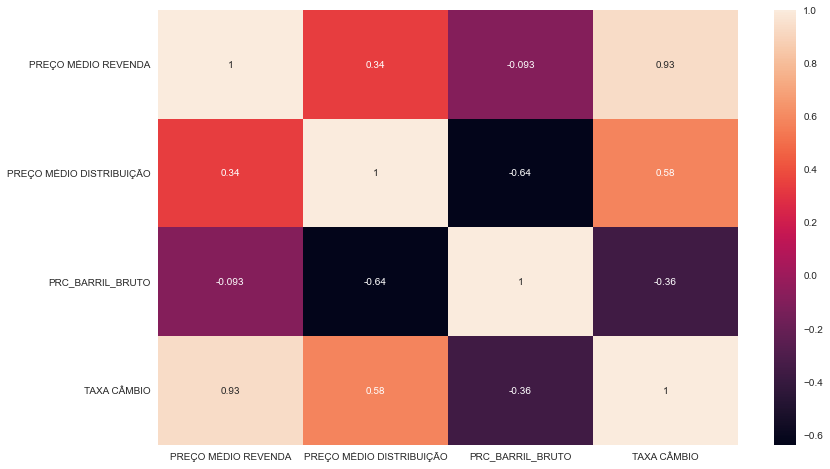

In [186]:
plt.figure(figsize=(13,8))
sns.heatmap(preco_anual_df.corr(),annot=True)
plt.show()

### Machine learning

In [187]:
df_prc_comb.head(5)

,PRODUTO,REGIÃO,ESTADO,PREÇO MÉDIO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,ANO,SIGLA_UF,PRC_BARRIL_BRUTO,TAXA CÂMBIO
MÊS,,,,,,,,,
2008-01,ETANOL HIDRATADO,NORTE,ACRE,2.098,1.790,2008,AC,94.007419,1.774259
2008-01,ETANOL HIDRATADO,NORDESTE,ALAGOAS,1.701,1.502,2008,AL,94.007419,1.774259
2008-01,ETANOL HIDRATADO,NORTE,AMAPÁ,1.950,1.730,2008,AP,94.007419,1.774259
2008-01,ETANOL HIDRATADO,NORTE,AMAZONAS,1.749,1.559,2008,AM,94.007419,1.774259
2008-01,ETANOL HIDRATADO,NORDESTE,BAHIA,1.653,1.384,2008,BA,94.007419,1.774259


In [188]:
models = {}

In [189]:
reg_df = df_prc_comb[df_prc_comb.SIGLA_UF == 'RJ'].groupby(['PRODUTO', 'MÊS']).mean()

In [190]:
reg_df = reg_df.iloc[reg_df.index.get_level_values('PRODUTO') == 'GASOLINA COMUM'].groupby('MÊS').mean()

In [191]:
 # Separa eixos da regressão
X = reg_df.drop(['PREÇO MÉDIO REVENDA','PREÇO MÉDIO DISTRIBUIÇÃO','ANO','PRC_BARRIL_BRUTO'] , axis =1)
Y = reg_df['PREÇO MÉDIO REVENDA'].values

In [192]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [193]:
# Cria model de regressão e faz o treinamento
lr=LinearRegression()
lr.fit(x_train,y_train)

models = lr
predicted_values = []
for i in range(0, len(y_test)):
    predicted_values.append(lr.predict(x_test.iloc[[i],:])[0])

In [194]:
predicted_df = pd.DataFrame({'Cambio':x_test['TAXA CÂMBIO'].values, 
                             'Valor Real':y_test, 'Valor Predito':predicted_values})

In [195]:
predicted_df.head(5)

,Cambio,Valor Real,Valor Predito
0,1.841633,2.687,2.628914
1,2.268029,3.128,3.112641
2,2.028736,2.851,2.841174
3,1.597009,2.854,2.351397
4,4.968382,7.517,6.176081


In [196]:
r2_score(predicted_df["Valor Real"], predicted_df["Valor Predito"])

0.9009673201528082

In [197]:
predicted_df.sort_values(by=['Cambio']).set_index('Cambio')

,Valor Real,Valor Predito
Cambio,,
1.563938,2.867,2.313880
1.586447,2.922,2.339416
1.591413,2.543,2.345049
1.597009,2.854,2.351397
1.726160,2.615,2.497914
1.772570,2.853,2.550564
1.806529,2.635,2.589089
1.841633,2.687,2.628914
1.854835,2.855,2.643890


In [198]:
# Create figure with secondary y-axis
fig_3 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_3.add_trace(
    go.Bar(x=predicted_df.index, y=predicted_df['Valor Real'], name="Valor Real"),
    secondary_y=True,
)

fig_3.add_trace(
    go.Bar(x=predicted_df.index, y=predicted_df['Valor Predito'], name="Valor Predito"),
    secondary_y=False,
)

# Add figure title
fig_3.update_layout(
    title_text="Regressão - Gasolina Comum"
)

# Set x-axis title
fig_3.update_xaxes(title_text="Câmbio")

# Set y-axes titles
fig_3.update_yaxes(title_text="<b>Valor Real</b>", secondary_y=False)
fig_3.update_yaxes(title_text="<b>Valor Predito</b>", secondary_y=True)

fig_3.show()

### Randon forest regressor

In [199]:
models_RF = {}

In [200]:
 # Separa eixos da regressão
X = reg_df.drop(['PREÇO MÉDIO REVENDA','PREÇO MÉDIO DISTRIBUIÇÃO','ANO','PRC_BARRIL_BRUTO'] , axis =1)
Y = reg_df['PREÇO MÉDIO REVENDA'].values

In [201]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [202]:
rf = RandomForestRegressor()

In [203]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [204]:
models_RF = rf
predicted_values_rf = []
for i in range(0, len(y_test)):
    predicted_values_rf.append(rf.predict(x_test.iloc[[i],:])[0])

In [205]:
predicted_rf_df = pd.DataFrame({'Cambio_rf':x_test['TAXA CÂMBIO'].values, 
                            'Valor_Real':y_test, 'Valor_Predito':predicted_values_rf})

In [206]:
predicted_rf_df.sample(5)

,Cambio_rf,Valor_Real,Valor_Predito
8,1.756570,2.651,2.64984
9,5.251718,6.454,7.18584
7,1.795309,2.849,2.65035
12,3.424477,3.907,3.95065
23,1.772570,2.853,2.59412


In [207]:
r2_score(predicted_rf_df["Valor_Real"], predicted_rf_df["Valor_Predito"])

0.8371295616493034

### Previsão dos valores

In [208]:
resultado = {}

In [209]:
resultado['2020-01'] = df_tx_cambio['cotacaoVenda'].iloc[-1]

In [210]:
for i in range(2021, 2031):
    ano_passado = str(i - 1)+'-01'
    ano_corrente = str(i)+'-01'
    resultado[ano_corrente]  = (resultado[ano_passado] * 0.04) + resultado[ano_passado]

In [211]:
resultado_df = pd.DataFrame(list(resultado.items()), columns = ['MÊS', 'TAXA CÂMBIO'])

In [212]:
resultado_df['MÊS'] = pd.to_datetime(resultado_df['MÊS'])
resultado_df.set_index('MÊS', inplace=True)

In [213]:
resultado_df['PREVISÃO'] = models.predict(resultado_df)

In [214]:
resultado_df

,TAXA CÂMBIO,PREVISÃO
MÊS,,
2020-01-01,4.937617,6.141179
2021-01-01,5.135121,6.365240
2022-01-01,5.340526,6.598263
2023-01-01,5.554147,6.840607
2024-01-01,5.776313,7.092645
2025-01-01,6.007366,7.354765
2026-01-01,6.247660,7.627369
2027-01-01,6.497567,7.910878
2028-01-01,6.757469,8.205727
